## Chapter 2: Neural Network Classification with PyTorch

Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options).

### Table of Contents:
1. [Data Preparation](#prepare)
   * 1.1 [Check input and output shapes](#shapes)
   * 1.2 [Turn data into tensors and create train and test splits](#tensors)
2. [Building a Model](#build)
    * 2.1 [Setup loss function and optimizer](#setup)
3. [Train Model](#train)
    * 3.1 [Going from raw logits -> prediction probabilities -> prediction labels](#going)
    * 3.2 [Building a training and test loop](#loop)
4. [Make predictions and evaluate the model](#evaluate)
5. [Improving a model (from a model perspective)](#improve)
    * 5.1 [Preparing data to see if our model can fit a straight line](#straight)
    * 5.2 [Adjusting `model_1` to fit a straight line](#fit)
6. [The missing piece : Non-Linearity](#non-linearity)
    * 6.1 [Recreating non-linear data (red and blue circles)](#recreate)
    * 6.2 [Building a model with non-linearity](#build-model)
    * 6.3 [Training a model with non-linearity](#train-model)
    * 6.4 [Evaluating a model trained with non-linear activation functions](#evaluate-model)
7. [Replicating non-linear activation functions](#replicate)
8. [Putting it all together with a multi-class classification problem](#together)
    * 8.1 [Creating a toy multi-class dataset](#multi-class)
    * 8.2 [Building a multi-class classification model in PyTorch](#multi-build)
    * 8.3 [Create a loss function and an optimizer for a multi-class classification model](#loss)
    * 8.4 [Getting prediction probabilities for a multi-class PyTorch model](#pred-prob)
    * 8.5 [Creating a training loop and testing loop for a multi-class PyTorch Model](#multi-loop)
    * 8.6 [Making and evaluating predictions with a PyTorch multi-class model](#multi-make)
9. [A few more classification metrics... (to evaluate our classification model)](#metrics)

### What is a classification problem?
![neural](neural1.png)

In [153]:
what_are_we_going_to_cover = {
    1: "architecture of a neural network classification model",
    2: "input shapes and output shapes of a classification model (features and labels)",
    3: "creating custom data to view, fit on and predict on",
    4: "steps in modelling - creating a model",
    5: "steps in modelling - setting a loss function and optimizer",
    6: "steps in modelling - creating a training loop",
    7: "steps in modelling - evaluating a model",
    8: "Saving and loading models",
    9: "Harnessing the power of non-linearity",
    10: "Different classification evaluation methods"
}
what_are_we_going_to_cover

{1: 'architecture of a neural network classification model',
 2: 'input shapes and output shapes of a classification model (features and labels)',
 3: 'creating custom data to view, fit on and predict on',
 4: 'steps in modelling - creating a model',
 5: 'steps in modelling - setting a loss function and optimizer',
 6: 'steps in modelling - creating a training loop',
 7: 'steps in modelling - evaluating a model',
 8: 'Saving and loading models',
 9: 'Harnessing the power of non-linearity',
 10: 'Different classification evaluation methods'}

### Architecture of a Neural Network
![Neural Architecture](neural2.png)

### 1. Make classification data and get it ready<a class='anchor' id ='prepare'>

In [2]:
import sklearn 

In [3]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000
# Create circles
X, y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [4]:
len(X), len(y) # We have 1000 samples of X(features) and y(labels)

(1000, 1000)

In [5]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [6]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1":X[:,0],
                        "X2":X[:,1],
                      "label":y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [7]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

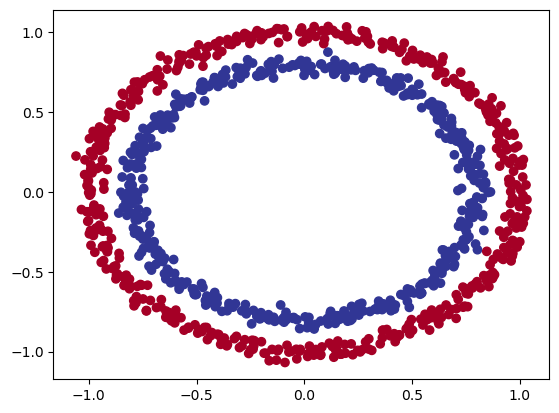

In [8]:
# Visualize
import matplotlib.pyplot as plt
plt.scatter(x = X[:,0],
            y = X[:,1],
            c = y,
            cmap = plt.cm.RdYlBu)
# Given X1, X2 predict if it's going to be a blue dot or a red dot

*Note* : The data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment on but still sizeable enough to practice the fundamentals of neural network classification.

### 1.1 Check input and output shapes<a class='anchor' id ='shapes'>

In [9]:
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of x : {X_sample} and the same for y: {y_sample}")
print(f"Shape for one sample of x: {X_sample.shape} and the same for y:{y_sample.shape}")

Values for one sample of x : [0.75424625 0.23148074] and the same for y: 1
Shape for one sample of x: (2,) and the same for y:()


### 1.2 Turn data into tensors and create train and test splits<a class='anchor' id ='tensors'>

In [11]:
import torch
torch.__version__

'2.0.1'

In [12]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [13]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [14]:
type(X), X.dtype, type(y), y.dtype

(torch.Tensor, torch.float32, torch.Tensor, torch.float32)

In [15]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y, 
                                                 test_size=0.2, # 20% of data will be test and 80% will be train
                                                 random_state=42)                               

In [16]:
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

### 2. Building a model<a class='anchor' id ='build'>
    
Let's build a model to classify our blue and red dots.
    
To do so, we want to:
    
1. Setup device agnostic code so our code will run on an accelerator (GPU) if there is one
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop

In [17]:
# Import torch and nn
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [18]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

 Now we've setup device agnostic code, let's create a model that:
 
    1. Subclass `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
    2. Create two `nn.linear()` layers that are capable of handling the shapes of our data
    3. Defines a `forward()` method that outlines the forward pass (or forward computation) of the model
    4. Instantiate an instance of our model class and send it to the target device

In [19]:
X_train.shape

torch.Size([800, 2])

In [20]:
y_train[:5]

tensor([1., 0., 0., 0., 1.])

In [21]:
# Creating a multi layer neural network
# The benefit of subclassing is that when we have more complex forward pass, it's important to know how to build your own subclasses of nn.Module

# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create two nn.Linear lyers capable of handling the shapes of our data
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 features
        # in_feature should match the out_feature of previous layer
        self.layer_2 = nn.Linear(in_features=5,out_features=1) # takes in 5 features from previous layer and outputs a single feature (same shape as y)
        
#         self.two_linear_layers = nn.Sequential(
#             nn.Linear(in_features=2, out_features=5),
#             nn.Linear(in_features=5, out_features=1)
#         )
    # 3. Define a forward method that outlines the forward pass
    def forward(self,x):
        return self.layer_2(self.layer_1(x)) # x-> layer_1 -> layer_2 -> output
#         return two_linear_layers(x)
# 4 . Instantiate an instance of our model class and send it to the traget device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [22]:
device

'cpu'

In [23]:
next(model_0.parameters()).device # our model's parameter are on the cpu device

device(type='cpu')

In [24]:
# Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [25]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.0261, -0.6927],
                      [-0.2211,  0.1515],
                      [-0.3223, -0.2126],
                      [-0.5889,  0.1855],
                      [-0.0135, -0.1794]])),
             ('0.bias', tensor([ 0.5727,  0.1326,  0.6626,  0.4593, -0.1395])),
             ('1.weight',
              tensor([[ 0.0216, -0.2634, -0.0800,  0.3183, -0.3778]])),
             ('1.bias', tensor([-0.0180]))])

In [26]:
# Make Predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions:  {len(untrained_preds)},Shape:{untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n {y_test[:10]}")

Length of predictions:  200,Shape:torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [-0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.]])

First 10 labels:
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [27]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### 2.1 Setup loss function and optimizer<a class='anchor' id ='setup'>
    
Which loss function or optimizer should you use?
   
Again... this is problem specific.
    
For example for regression you might want MAE or MSE (mean absolute error or mean squared error).

For classification you might want binary cross entropy or categorical cross entropy (cross entropy)
    
As a reminder, the loss function measures how *wrong* your model's predictions are.
    
![Loss Function & Optimizer](neural3.png)
    
    Logit
    In context of deep learning the logits layer means the layer that feeds in to softmax (or other such normalization). The output of the softmax are the probabilities for the classification task and its input is logits layer. 
    
And for optimizers two of the most common and useful are SGD and Adam, however PyTorch has many built-in options. 
   
For the loss function we are going to use `torch.nn.BECWWithLogitsLoss()`

For different optimizers see `torch.optim()`

In [28]:
# Setup the loss funcion
# loss_fn = nn.BCELoss() # requires inputs to have gone through the sigmoid activation function prior to input to BCELoss 

# Using Sequential
# nn.Sequential(
#     nn.Sigmoid(),
#     nn.BCELoss()
# )

loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss has the sigmoid function built-in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr = 0.1)

In [29]:
# Calculate accuracy - out of 100 examples what percentage does our model get right?
def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc     = (correct/len(y_pred)) * 100
    return acc

### Train model<a class='anchor' id ='train'>
    
 To train our model, we are going to need to build a training loop with the following steps:
    
    1. Forward Pass
    2. Calculate the loss
    3. Optimizer zero grad
    4. Loss backward (Back Propogation)
    5. Optimizer Step (Gradient Descent)

#### 3.1 Going from raw logits -> prediction probabilities -> prediction labels<a class='anchor' id ='going'>
    
Our model outputs are going to be raw **logits**.
    
We can convert these **logits** into prediction probabilities by passing them into some kind of activation function (e.g. sigmoid for binary crossentropy and softmax for multiclass classification).
    
Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`.

In [30]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[ 2.0275e-01],
        [ 1.8926e-01],
        [ 1.4604e-01],
        [ 2.1921e-01],
        [-1.3947e-04]])

In [31]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [32]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5505],
        [0.5472],
        [0.5364],
        [0.5546],
        [0.5000]])

For our prediction probability values we need to perform a range-style rounding on them:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` <= 0.5, `y=0` (class 0)

In [33]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full(logits -> pred probs -> pred labels )
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 1., 1., 1., 0.])

In [34]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

#### 3.2 Building a training and test loop<a class='anchor' id ='loop'>

In [35]:
device

'cpu'

In [36]:
# !nvidia-smi # tells if we have an nvidia GPU with CUDA network

In [37]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to target device
X_train, y_train = X_train.to(device) , y_train.to(device)
X_test , y_test  = X_test.to(device)  , y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ## Training
    model_0.train()
    
    ## 1. Forward Pass
    y_logits = model_0(X_train).squeeze()
    y_pred   = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels
    
    ## 2. Calculate loss/accuracy
    # calling torch.sigmoid into our logits, turn logits into prediction probabilities
#     loss = loss_fn(torch.sigmoid(y_logits), # nn.BCELoss expects prediction probabilities as input
#                   y_train)
    # BCEWithLogitsLoss (more numerically stable)  : Combines sigmoid layer and the BCELoss in one single class
    loss = loss_fn(y_logits, #nn.BCEWithLogitsLoss expects raw logits as input
                   y_train)
    acc  = accuracy_fn(y_true = y_train,
                       y_pred = y_pred)
    
    # 3. Optimizer zero gard
    optimizer.zero_grad()
    
    # 4. Loss Backward (Back Propogation)
    loss.backward()
    
    # 5. Optimizer step (Gradient descent)
    optimizer.step()
    
    # Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward Pass
        test_logits = model_0(X_test).squeeze()
        test_pred   = torch.round(torch.sigmoid(test_logits)) 
        
        # 2. Calculate test loss/acc
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc  = accuracy_fn(y_true = y_test,
                                y_pred = test_pred)
    # Print out what's happenin'
    if epoch%10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")
        

Epoch: 0 | Loss: 0.69516, Acc: 58.88% | Test loss: 0.69619, Test acc: 54.50%
Epoch: 10 | Loss: 0.69396, Acc: 52.25% | Test loss: 0.69538, Test acc: 52.00%
Epoch: 20 | Loss: 0.69356, Acc: 51.75% | Test loss: 0.69513, Test acc: 50.00%
Epoch: 30 | Loss: 0.69339, Acc: 51.00% | Test loss: 0.69502, Test acc: 49.00%
Epoch: 40 | Loss: 0.69330, Acc: 50.88% | Test loss: 0.69494, Test acc: 51.00%
Epoch: 50 | Loss: 0.69325, Acc: 50.50% | Test loss: 0.69488, Test acc: 50.00%
Epoch: 60 | Loss: 0.69320, Acc: 50.38% | Test loss: 0.69482, Test acc: 49.50%
Epoch: 70 | Loss: 0.69316, Acc: 50.50% | Test loss: 0.69476, Test acc: 48.00%
Epoch: 80 | Loss: 0.69313, Acc: 50.38% | Test loss: 0.69472, Test acc: 48.00%
Epoch: 90 | Loss: 0.69311, Acc: 50.38% | Test loss: 0.69468, Test acc: 48.00%
Epoch: 100 | Loss: 0.69309, Acc: 50.75% | Test loss: 0.69464, Test acc: 48.00%
Epoch: 110 | Loss: 0.69307, Acc: 50.25% | Test loss: 0.69461, Test acc: 49.00%
Epoch: 120 | Loss: 0.69306, Acc: 50.50% | Test loss: 0.69459, T

### 4. Make predictions and evaluate the model<a class='anchor' id ='evaluate'>
From the metrics it looks like our model isn't learning anything...

So to inspect it let's make some predictions and make them visual!

In other words, "Visualise, visualise, visualise.."

To do so we are going to import a function called `plot_decision_boundary()`


In [38]:
import requests
from pathlib import Path

# Download helper functions from PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
    
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py","wb") as f:
        f.write(request.content)
        
from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


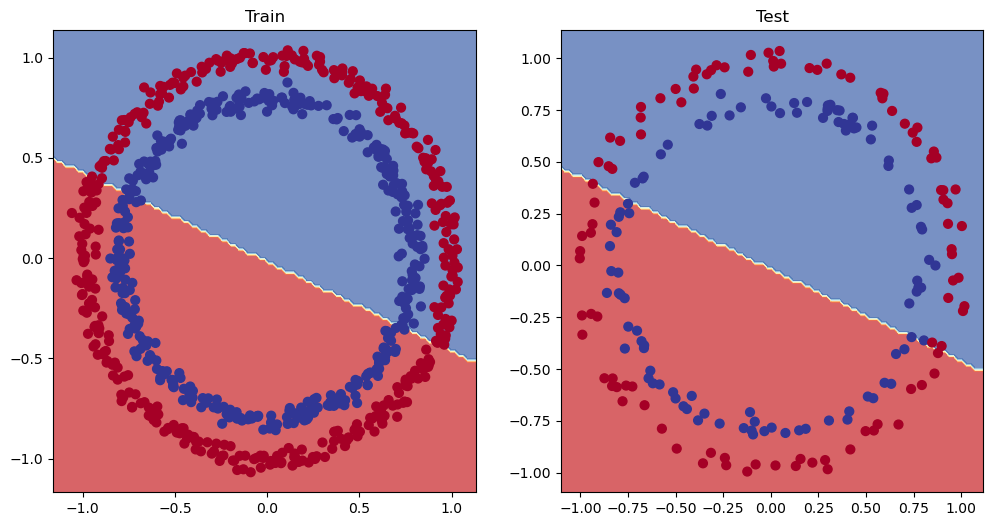

In [39]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

### 5. Improving a model (from a model perspective)<a class='anchor' id ='improve'>
    * Add more layers - give the model more chances to learn about patterns in the data.
    * Add more hidden units - go from 5 hidden units to 10 hidden units
    * Fit for longer
    * Changing the activation functions
    * Change the learning rate
    
 These options are all from a model's perspective because they deal directly with the model    rather than the data. 
    
And because these options are all values we (as machine learning engineers and data scientists) can change, they are referred as **hyperparameters**
    
Let's try and improve our model by: (usually we only change one value at a time and check the result)
    
    * Adding more hidden units : 5 -> 10
    * Increase the number of layers : 2 -> 3
    * Increase the number of epochs : 100 -> 1000
    
![Improving our Model](neural4.png)

In [40]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features = 2 , out_features = 10)
        self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
        self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
        
    def forward(self,x):
#         z = self.layer_1(x)
#         z = self.layer_2(z)
#         z = self.layer_3(z)
        return self.layer_3(self.layer_2(self.layer_1(x))) # this way of writing operations leverages speed ups where possible behind the scenes

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [41]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.0292, -0.6934],
                      [-0.2593,  0.1622],
                      [-0.3378, -0.2083],
                      [-0.5542,  0.1750],
                      [-0.0629, -0.1652]])),
             ('0.bias', tensor([ 0.5726,  0.1385,  0.6644,  0.4512, -0.1306])),
             ('1.weight',
              tensor([[ 0.0382, -0.3044, -0.1315,  0.2248, -0.3730]])),
             ('1.bias', tensor([-0.0416]))])

In [42]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [43]:
# Create a loss function
loss_fn  = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                           lr = 0.1 )

In [44]:
# Writing a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer
epochs = 1000

# Put data on the target device
X_train, y_train = X_train.to(device) , y_train.to(device)
X_test , y_test  = X_test.to(device)  , y_test.to(device)

for epoch in range(epochs):
    # Training
    model_1.train()
    # 1. Forward Pass
    y_logits = model_1(X_train).squeeze()
    y_pred   = torch.round(torch.sigmoid(y_logits)) # logits -> pred probabilities -> pred labels
    
    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc  = accuracy_fn(y_true = y_train,
                       y_pred = y_pred )
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Loss backwards (Backpropogation)
    loss.backward()
    
    # 5. Optimizer step (gradient descent)
    optimizer.step()
    
    # Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward Pass
        test_logits = model_1(X_test).squeeze()
        test_pred   = torch.round(torch.sigmoid(test_logits))
        # 2. Calculate loss
        test_loss   = loss_fn(test_logits,y_test)
        test_acc    = accuracy_fn(y_true = y_test,
                                  y_pred = test_pred)
        # Print out what's happenin
        if epoch % 100 == 0:
            print(f"Epoch : {epoch} | Loss: {loss:.5f} | Acc : {acc:.2f} | Test Loss: {test_loss: .5f} | Test acc : {test_acc:.2f}")
    

Epoch : 0 | Loss: 0.69396 | Acc : 50.88 | Test Loss:  0.69261 | Test acc : 51.00
Epoch : 100 | Loss: 0.69305 | Acc : 50.38 | Test Loss:  0.69379 | Test acc : 48.00
Epoch : 200 | Loss: 0.69299 | Acc : 51.12 | Test Loss:  0.69437 | Test acc : 46.00
Epoch : 300 | Loss: 0.69298 | Acc : 51.62 | Test Loss:  0.69458 | Test acc : 45.00
Epoch : 400 | Loss: 0.69298 | Acc : 51.12 | Test Loss:  0.69465 | Test acc : 46.00
Epoch : 500 | Loss: 0.69298 | Acc : 51.00 | Test Loss:  0.69467 | Test acc : 46.00
Epoch : 600 | Loss: 0.69298 | Acc : 51.00 | Test Loss:  0.69468 | Test acc : 46.00
Epoch : 700 | Loss: 0.69298 | Acc : 51.00 | Test Loss:  0.69468 | Test acc : 46.00
Epoch : 800 | Loss: 0.69298 | Acc : 51.00 | Test Loss:  0.69468 | Test acc : 46.00
Epoch : 900 | Loss: 0.69298 | Acc : 51.00 | Test Loss:  0.69468 | Test acc : 46.00


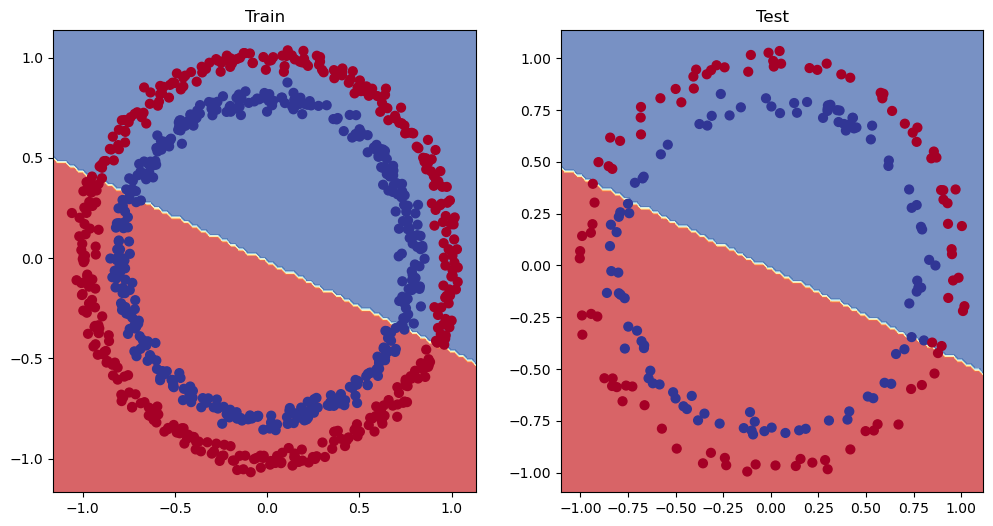

In [45]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,X_test,y_test)

#### 5.1 Preparing data to see if our model can fit a straight line <a class='anchor' id ='straight'>
    
One way to troubleshoot to a larger problem is to test out a samller problem

In [46]:
# Create some data(same as notebook 01)
weight = 0.7
bias   = 0.3
start  = 0
end    = 1
step   = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim = 1)
y_regression = weight * X_regression + bias # Linear Regression Formula (without epsilon)

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [58]:
# Create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression,  y_test_regression  = X_regression[train_split:], y_regression[train_split:]

# Chcek the lengths of each
len(X_train_regression) , len(X_test_regression) , len(y_train_regression) , len(y_test_regression)

(80, 20, 80, 20)

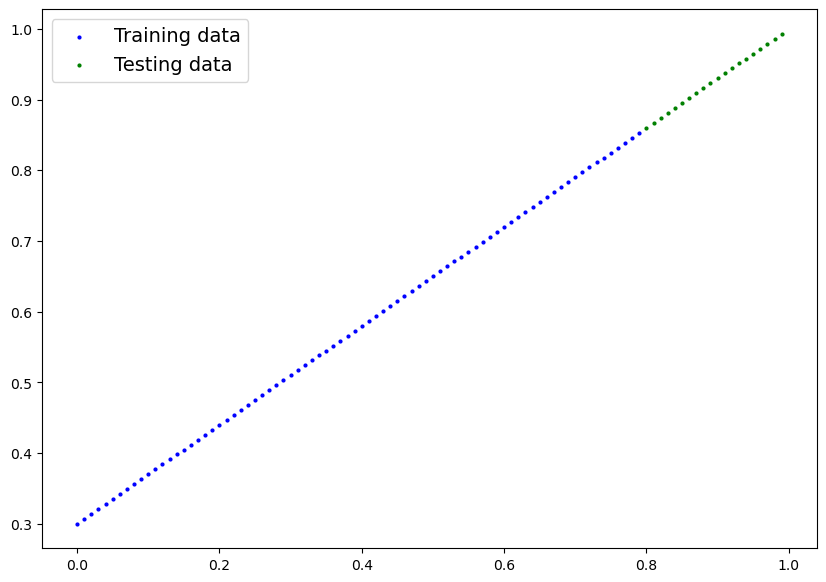

In [59]:
plot_predictions(train_data   = X_train_regression,
                 train_labels = y_train_regression,
                 test_data    = X_test_regression,
                 test_labels  = y_test_regression)

#### 5.2 Adjusting `model_1` to fit a straight line<a class='anchor' id ='fit'>

In [60]:
X_train_regression[:10] , y_train_regression[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280],
         [0.3350],
         [0.3420],
         [0.3490],
         [0.3560],
         [0.3630]]))

In [61]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [62]:
# Same architecture as model_1 (but using nn.Sequential())
model_2 = nn.Sequential(
    nn.Linear(in_features = 1,  out_features = 10),
    nn.Linear(in_features = 10, out_features = 10),
    nn.Linear(in_features = 10, out_features = 1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [63]:
# Loss and optimizer
loss_fn   = nn.L1Loss() # MAE loss with regression data
optimizer = torch.optim.SGD(model_2.parameters(),lr = 0.01)

In [64]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put the data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device) , y_train_regression.to(device)
X_test_regression , y_test_regression  = X_test_regression.to(device)  , y_test_regression.to(device)

# Training
for epoch in range(epochs):
    y_pred = model_2(X_train_regression)
    loss   = loss_fn(y_pred, y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Testing
    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fn(test_pred, y_test_regression)
        
    # Print out what's happenin'
    if epoch % 100 == 0 :
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")


Epoch: 0 | Loss: 0.75986 | Test loss: 0.91103
Epoch: 100 | Loss: 0.02858 | Test loss: 0.00081
Epoch: 200 | Loss: 0.02533 | Test loss: 0.00209
Epoch: 300 | Loss: 0.02137 | Test loss: 0.00305
Epoch: 400 | Loss: 0.01964 | Test loss: 0.00341
Epoch: 500 | Loss: 0.01940 | Test loss: 0.00387
Epoch: 600 | Loss: 0.01903 | Test loss: 0.00379
Epoch: 700 | Loss: 0.01878 | Test loss: 0.00381
Epoch: 800 | Loss: 0.01840 | Test loss: 0.00329
Epoch: 900 | Loss: 0.01798 | Test loss: 0.00360


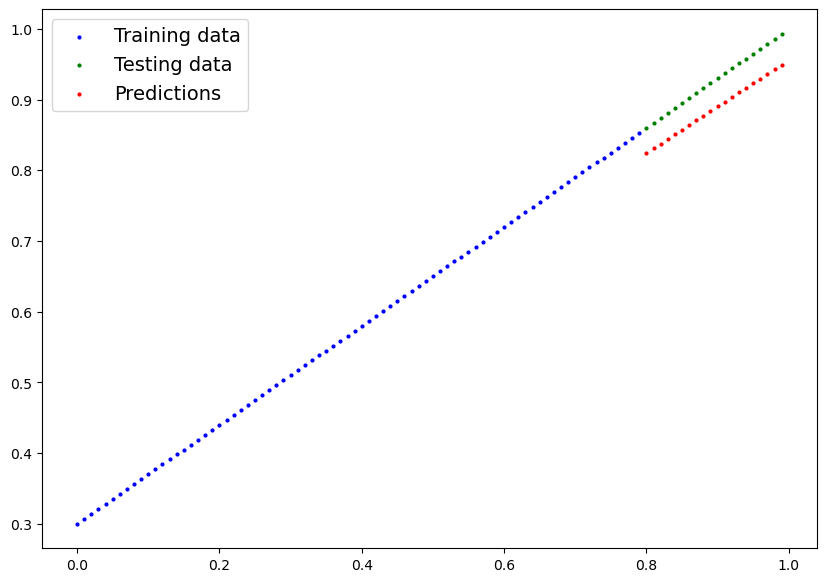

In [67]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)
    
# Plot data and predictions
plot_predictions(train_data   = X_train_regression.cpu(),
                 train_labels = y_train_regression.cpu(),
                 test_data    = X_test_regression.cpu(),
                 test_labels  = y_test_regression.cpu(),
                 predictions  = y_preds.cpu())

### The missing piece : Non-linearity <a class='anchor' id ='non-linearity'>
    
"What patterns could you draw if you were given an infinite amount of a straight and non-straight lines?"
    
Or in machine learning terms, an infinite (but really is finite) amount of linear and non-linear functions?

#### 6.1 Recreating non-linear data (red and blue circles) <a class='anchor' id ='recreate'>

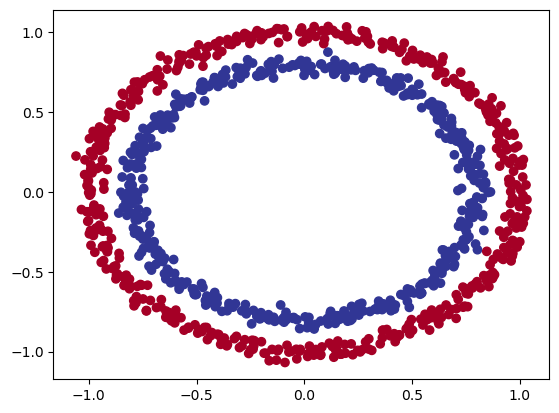

In [69]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state = 42)

plt.scatter(X[:,0], X[:,1], c = y, cmap = plt.cm.RdYlBu)

In [70]:
# Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

X_train[:5] , y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

#### 6.2 Building a model with non-linearity<a class='anchor' id ='build-model'>
    
* Linear     = straight linear
* Non-linear = non-straight lines
    
Artificial Neural Networks are a large combination of linear(straight) and non-straight(non-linear) functions which are potentially able to find patterns in data.

In [71]:
# Build a model with non-linear activation functions
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features = 2, out_features  =  10)
        self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
        self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
        self.relu    = nn.ReLU() # relu is a non-linear activation function
        
    def forward(self,x):
        # Where should we put our non-linear activation functions
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    
# Instantiating our model
model_3 = CircleModelV2().to(device)
model_3 

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [72]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                           lr = 0.1)

#### 6.3 Training a model with non-linearity<a class='anchor' id ='train-model'>

In [152]:
# Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test,  y_test  = X_test.to(device) , y_test.to(device)

# Loop through data
epochs = 1000
for epoch in range(epochs):
    # Training
    model_3.train()
    
    # 1. Forward Pass
    y_logits = model_3(X_train).squeeze()
    y_pred   = torch.round(torch.sigmoid(y_logits)) # logits -> pred probabilities -> pred labels
    
    # 2. Calculate the loss
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss (takes in logits as first input)
    acc  = accuracy_fn(y_true = y_train,
                       y_pred = y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # Loss Backward
    loss.backward()
    
    # 5. Step the optimizer
    optimizer.step()
    
    ## Testing
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred   = torch.round(torch.sigmoid(test_logits))
        
        test_loss   = loss_fn(test_logits, y_test)
        test_acc    = accuracy_fn(y_true = y_test,
                                  y_pred = test_pred)
        
        # Print out what's happenin
        if epoch % 100 == 0 :
            print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test loss:{test_loss:.4f}, Test Acc:{test_acc:.2f}")

Epoch: 0 | Loss: 2636.1721, Acc: 99.88% | Test loss:534.1228, Test Acc:100.00
Epoch: 100 | Loss: 2636.1721, Acc: 99.88% | Test loss:534.1228, Test Acc:100.00
Epoch: 200 | Loss: 2636.1721, Acc: 99.88% | Test loss:534.1228, Test Acc:100.00
Epoch: 300 | Loss: 2636.1721, Acc: 99.88% | Test loss:534.1228, Test Acc:100.00
Epoch: 400 | Loss: 2636.1721, Acc: 99.88% | Test loss:534.1228, Test Acc:100.00
Epoch: 500 | Loss: 2636.1721, Acc: 99.88% | Test loss:534.1228, Test Acc:100.00
Epoch: 600 | Loss: 2636.1721, Acc: 99.88% | Test loss:534.1228, Test Acc:100.00
Epoch: 700 | Loss: 2636.1721, Acc: 99.88% | Test loss:534.1228, Test Acc:100.00
Epoch: 800 | Loss: 2636.1721, Acc: 99.88% | Test loss:534.1228, Test Acc:100.00
Epoch: 900 | Loss: 2636.1721, Acc: 99.88% | Test loss:534.1228, Test Acc:100.00


#### 6.4 Evaluating a model trained with non-linear activation functions<a class='anchor' id ='evaluate-model'>

In [78]:
# Make predictions
model_3.eval()
with torch.inference_mode():
    # squeeze is to remove extra dimension (200,1) -> (200)
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

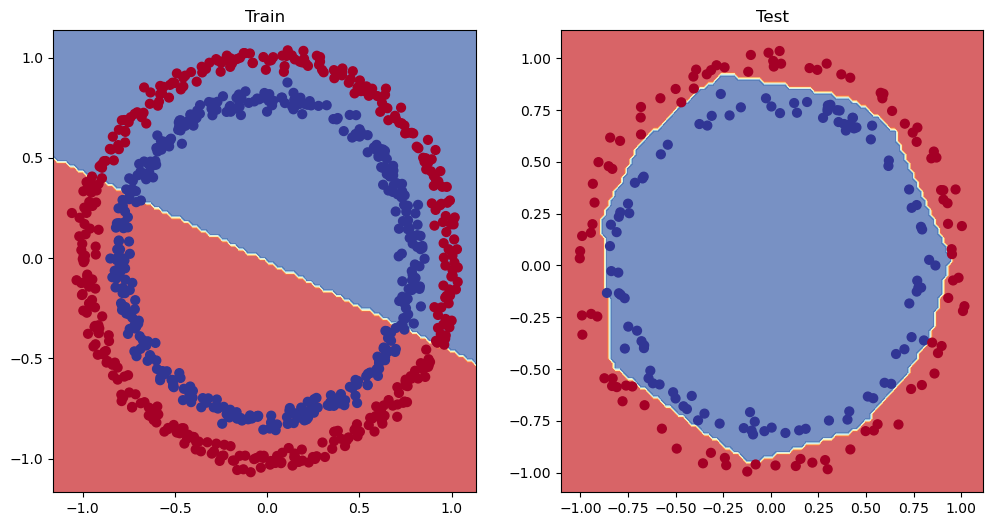

In [80]:
# Plot decision boundaries
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 : no non linearity
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test,  y_test) # model_3 : has non-linearity

### 7. Replicating non-linear activation functions<a class='anchor' id ='replicate'>
    
Neural Networks, rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the best patterns on its own.
    
And these tools are linear & non-linear functions.

In [81]:
# Create a tensor
A = torch.arange(-10,10,1,dtype = torch.float32)
A.dtype

torch.float32

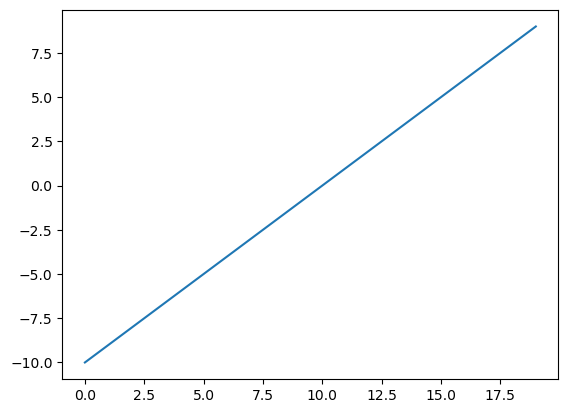

In [83]:
# Visualize the tensor
plt.plot(A)

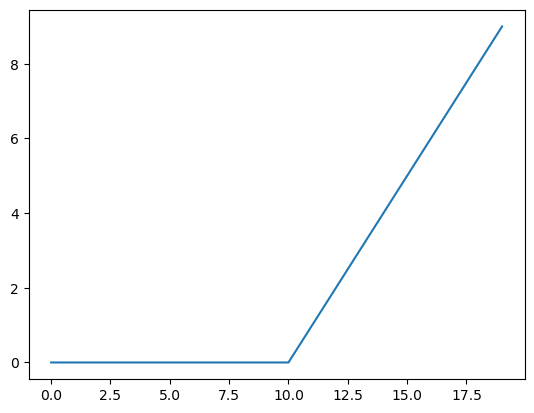

In [84]:
plt.plot(torch.relu(A))

In [85]:
def relu(x: torch.Tensor) -> torch.Tensor : # Input must be a tensor and should return torch.Tensor to
    return torch.maximum(torch.tensor(0),x) # inputs must be tensors

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

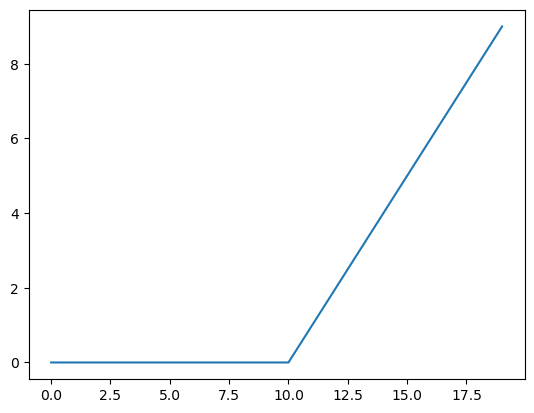

In [86]:
# Plot ReLU activation function
plt.plot(relu(A))

In [87]:
# Now let's do the same for sigmoid
def sigmoid(x):
    return 1/ (1 + torch.exp(-x))

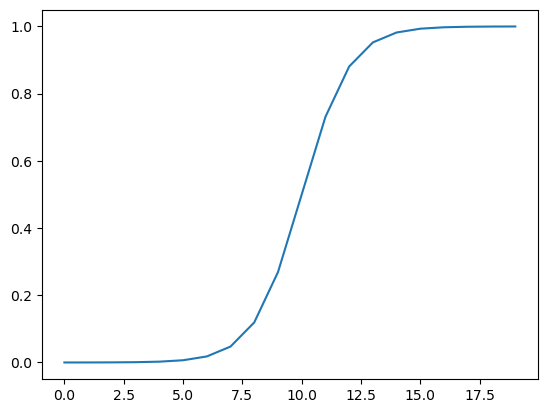

In [88]:
plt.plot(torch.sigmoid(A))

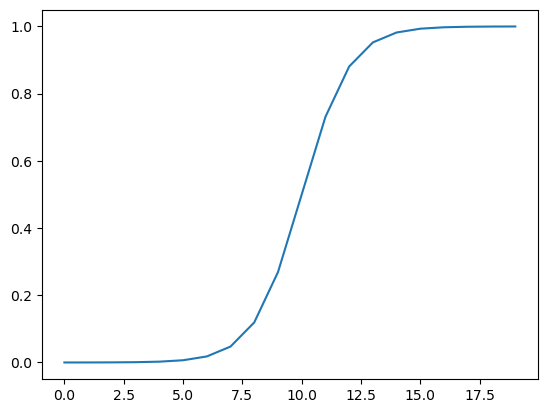

In [89]:
plt.plot(sigmoid(A))

### 8. Putting it all together with a multi-class classification problem<a class='anchor' id ='together'>
    
* *Binary Classification* = one thing or another (cat vs. dog, spam vs. not spam, fraud or not fraud)
* *Multi-class classification* = more than one thing or another (cat vs. dog vs. chicken)

#### 8.1 Creating a toy multi-class dataset <a class='anchor' id ='multi-class'>

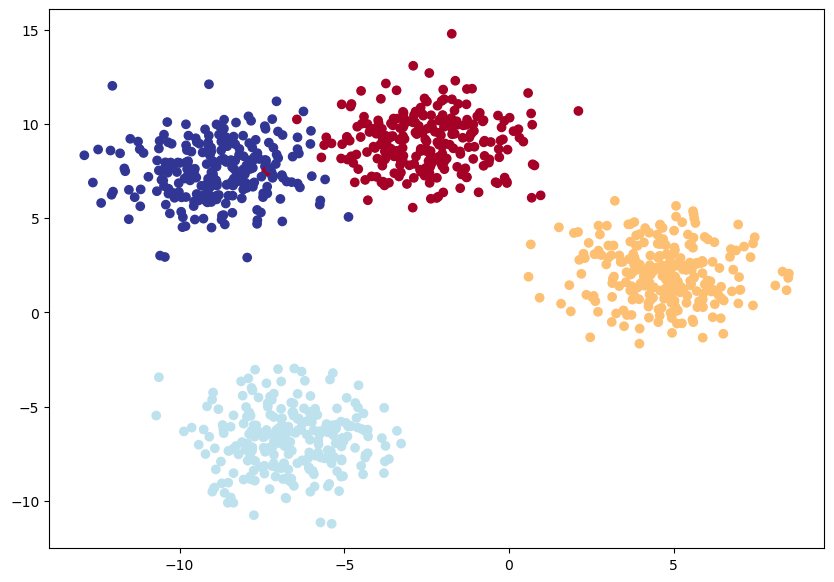

In [117]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES  = 4
NUM_FEATURES = 2
RANDOM_SEED  = 42

# 1. Create multi-class data
X_blob , y_blob = make_blobs(n_samples    = 1000,
                             n_features   = NUM_FEATURES,
                             centers      = NUM_CLASSES,
                             cluster_std  = 1.5, # give the cluster a little shake up
                             random_state = RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test split
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size    = 0.2,
                                                                        random_state = RANDOM_SEED)

# 4. Plot data (Visualize)
plt.figure(figsize = (10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c = y_blob, cmap = plt.cm.RdYlBu)

#### 8.2 Building a multi-class classification model in PyTorch<a class='anchor' id ='multi-build'>

In [118]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [119]:
# Build a multi-class classification model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units = 8):
        """ Initializes multi-class classifictaion model .
        Args :
            input_features  (int): Number of input features to the model
            output_features (int): Number of output featurs (number of output classes)
            hidden_units    (int): Number of hidden units between layers, default 8
            
        Returns:
        
        Example:
        
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features = input_features, out_features = hidden_units),
            nn.ReLU(),
            nn.Linear(in_features = hidden_units,   out_features = hidden_units),
            nn.ReLU(),
            nn.Linear(in_features = hidden_units,   out_features = output_features)
        )
        
    def forward(self,x):
        return self.linear_layer_stack(x)
    
# Create an instance of blob model and send it to the target device
model_4 = BlobModel(input_features = 2, # we have 2 X features
                    output_features= 4,
                    hidden_units   = 8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [120]:
X_blob_train.shape, y_blob_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [121]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

#### 8.3 Create a loss function and an optimizer for a multi-class classification model<a class='anchor' id ='loss'>

In [122]:
# Create a loss function for multi-class classification - loss function measures how wrong our predictions are
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer for multi-class classification - optimizer updates our model parameters to try and reduce the loss
optimizer = torch.optim.SGD(params = model_4.parameters(),
                            lr = 0.1) # learning rate is a hyperparameter that can be changed

#### 8.4 Getting prediction probabilities for a multi-class PyTorch model<a class='anchor' id ='pred-prob'>
    
In order to evaluate and train and test our model, we need to convert our model's outputs(logits) to prediction probabilities and then to prediction labels.
    
    logits(raw output of the model) -> pred probs(use `torch.softmax`) -> pred labels(take the argmax of the prediction probabilities)

In [123]:
# Let's get some raw outputs of our model (logits)
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test.to(device))
    
y_logits[:10] # we have to get our y_logits in same format as y_blob_test

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]])

In [124]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [125]:
# Convert our model's logit output to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim = 1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]])
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]])


In [126]:
torch.sum(y_pred_probs[0]) # all sum up to 1

tensor(1.)

In [127]:
torch.max(y_pred_probs[0]) # we get 4 values (1 value for each of 4 classes) that give us the prediction probability of each class (prob that particular data belong to class 1 , class 2 , class 3, or 4) 

tensor(0.3244)

In [128]:
torch.argmax(y_pred_probs[0]) # class 1 has max probability

tensor(1)

In [129]:
# Convert our model's prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim = 1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1])

In [130]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

#### 8.5 Creating a training loop and testing loop for a multi-class PyTorch Model<a class='anchor' id ='multi-loop'>

In [133]:
# Fit the multi-class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to the target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test , y_blob_test  = X_blob_test.to(device) , y_blob_test.to(device)

# Loop through data
for epoch in range(epochs):
    ## Training
    model_4.train()
    
    y_logits = model_4(X_blob_train)
    y_pred   = torch.softmax(y_logits, dim = 1).argmax(dim = 1)
    
    loss     = loss_fn(y_logits, y_blob_train)
    acc      = accuracy_fn(y_true = y_blob_train,
                           y_pred = y_pred)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    ## Testing
    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(X_blob_test)
        test_preds  = torch.softmax(test_logits, dim = 1).argmax(dim = 1)
        
        test_loss   = loss_fn(test_logits, y_blob_test)
        test_acc    = accuracy_fn(y_true = y_blob_test,
                                  y_pred = test_preds)
        
    # Print out what's happenin'
    if epoch % 10 == 0 :
        print(f"Epoch : {epoch} | Loss: {loss:.4f} | Acc: {acc:.2f}% | Test_loss: {test_loss:.4f} | Test acc: {test_acc:.2f}%")

Epoch : 0 | Loss: 0.9801 | Acc: 61.38% | Test_loss: 0.9413 | Test acc: 64.00%
Epoch : 10 | Loss: 0.5979 | Acc: 97.75% | Test_loss: 0.6128 | Test acc: 98.00%
Epoch : 20 | Loss: 0.3876 | Acc: 98.88% | Test_loss: 0.3907 | Test acc: 100.00%
Epoch : 30 | Loss: 0.2194 | Acc: 99.25% | Test_loss: 0.2088 | Test acc: 99.50%
Epoch : 40 | Loss: 0.0976 | Acc: 99.25% | Test_loss: 0.0884 | Test acc: 99.50%
Epoch : 50 | Loss: 0.0620 | Acc: 99.25% | Test_loss: 0.0543 | Test acc: 99.50%
Epoch : 60 | Loss: 0.0487 | Acc: 99.25% | Test_loss: 0.0410 | Test acc: 99.50%
Epoch : 70 | Loss: 0.0419 | Acc: 99.25% | Test_loss: 0.0337 | Test acc: 99.50%
Epoch : 80 | Loss: 0.0376 | Acc: 99.25% | Test_loss: 0.0291 | Test acc: 99.50%
Epoch : 90 | Loss: 0.0348 | Acc: 99.25% | Test_loss: 0.0261 | Test acc: 99.50%


#### 8.6 Making and evaluating predictions with a PyTorch multi-class model<a class='anchor' id ='multi-make'>

In [134]:
# Make predictions
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)
    
# View the first 10 predictions
y_logits[:10]

tensor([[-0.6265,  6.0263, -7.6651, -8.4859],
        [-2.1884, -6.4025, -3.7404,  3.1544],
        [-3.4378, -3.9215,  3.1833, -2.6303],
        [-1.1572,  4.2257, -3.8657, -4.9030],
        [ 3.7878, -1.3366, -9.1821, -6.9863],
        [-2.8353, -7.6102, -4.3199,  3.8288],
        [-3.0547, -3.3553,  2.8184, -2.1533],
        [ 3.4042, -4.0514, -6.9310, -3.5718],
        [-4.3962, -5.0225,  3.8457, -3.4044],
        [ 3.5306, -3.0359, -7.5747, -4.7342]])

In [135]:
# Go from logits -> Prediction Probabilities
y_pred_probs = torch.softmax(y_logits, dim = 1)
y_pred_probs[:10]

tensor([[1.2887e-03, 9.9871e-01, 1.1306e-06, 4.9756e-07],
        [4.7544e-03, 7.0294e-05, 1.0071e-03, 9.9417e-01],
        [1.3252e-03, 8.1698e-04, 9.9489e-01, 2.9716e-03],
        [4.5713e-03, 9.9502e-01, 3.0462e-04, 1.0796e-04],
        [9.9406e-01, 5.9140e-03, 2.3154e-06, 2.0810e-05],
        [1.2739e-03, 1.0750e-05, 2.8866e-04, 9.9843e-01],
        [2.7813e-03, 2.0591e-03, 9.8831e-01, 6.8500e-03],
        [9.9846e-01, 5.7729e-04, 3.2419e-05, 9.3263e-04],
        [2.6309e-04, 1.4063e-04, 9.9889e-01, 7.0933e-04],
        [9.9832e-01, 1.4043e-03, 1.5007e-05, 2.5699e-04]])

In [137]:
# Go from pred probs to pred labels
y_preds = torch.argmax(y_pred_probs, dim = 1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

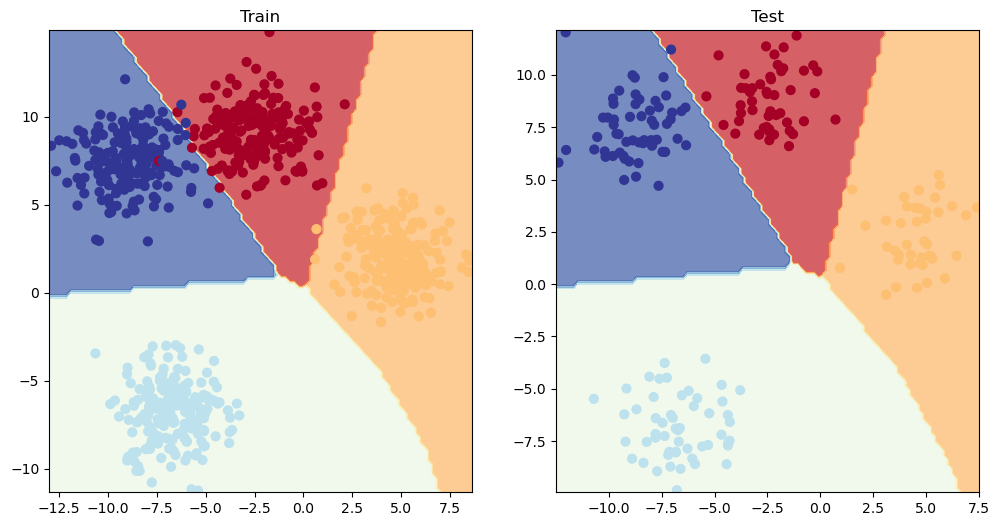

In [140]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)
# Since, our data is linearly seperable it will work even without adding non-linearity (ReLU)

### 9. A few more classification metrics... (to evaluate our classification model) <a class='anchor' id ='metrics'>
    
* Accuracy  : Out of 100 samples, how many does our model get right?
* Precision 
* Recall
* F1-score
* Confusion Matrix
* Classification report

![Metrics](neural5.png)

In [151]:
from torchmetrics import Accuracy

num_classes = 4
# Setup metric
torchmetric_accuracy = Accuracy(task='multiclass',                                           
                                     num_classes=num_classes).to(device)

# Calculate accuracy
torchmetric_accuracy(y_preds, y_blob_test)

tensor(0.9950)